In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from os import listdir
from os.path import isfile, join

In [2]:
def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)

def calculate_2dift(input):
    ift = np.fft.ifftshift(input)
    ift = np.fft.ifft2(ift)
    ift = np.fft.fftshift(ift)
    return ift.real

def process_image(input):
    input = input.convert("L")
    input = np.array(input)
    ft = calculate_2dft(input)
    return ft

def get_all_images(path):
    images = [f for f in listdir(path) if isfile(join(path, f))]
    return images


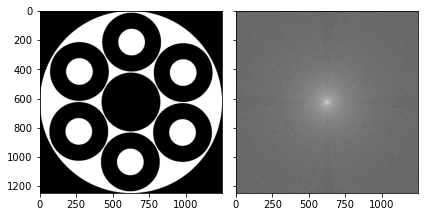

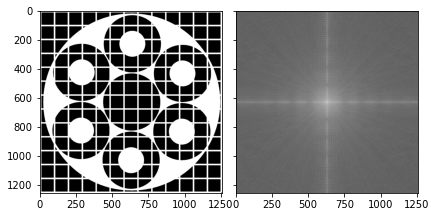

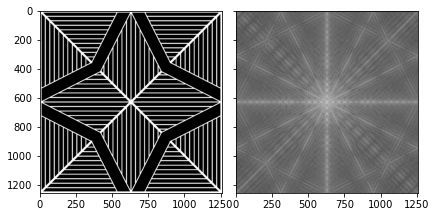

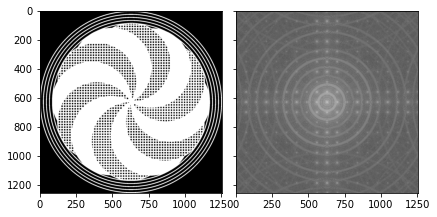

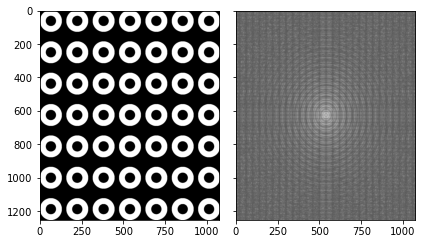

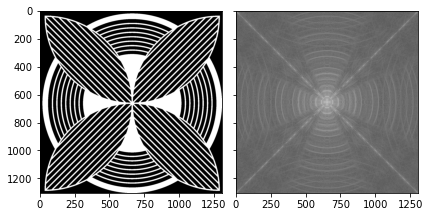

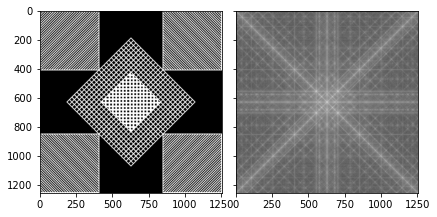

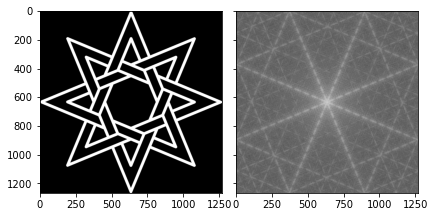

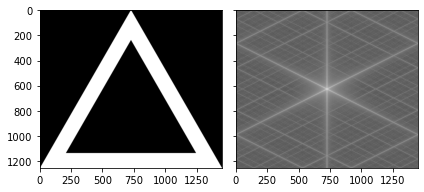

In [3]:
PATH = "images/real_image"
for img in get_all_images(PATH):
    im = Image.open(join(PATH, img))
    im = process_image(im)
    fig, axs = plt.subplots(1,2, sharey=True)
    axs[1].imshow(np.log(np.abs(im)), cmap='gray')
    axs[0].imshow(calculate_2dift(im), cmap='gray')
    plt.tight_layout()
    plt.savefig(fname=f"images/fourier_image/{img}", dpi=300)
    